In [1]:
#imoport some packages to use 
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
#To see our directory 
import os 
import random 
import gc #Gabage collector for cleanning data from memory 
from skimage import io, data_dir
from tensorflow.keras.models import Sequential
from scipy.misc import imread
#from matplotlib.pyplot import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import Dense
import pandas as pd
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.utils import to_categorical
#tf.compat.v2.keras.utils.to_categorical
#tf.keras.utils.to_categorical
#import tensorflow.compat.v2.keras.utils.to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import log_loss
from tensorflow.keras.layers import Input, Dense, Convolution2D, MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D, ZeroPadding2D, Dropout, Flatten, Reshape
from tensorflow.keras.layers import  Activation
from keras.layers import  merge
os.environ["CUDA_VISIBLE_DEVICES"] = "0,3"

Using TensorFlow backend.


# Labelling 

In [2]:
# A function to read and process the images to an acceptable format for our model 
def read_and_process_images(list_of_images):
    #Returns one array
   
    #y is an array of labels
   
    y = [] # labels
    for image in list_of_images:
       
    
        if 'new' in image:
            y.append(1)
        elif 'old' in image:
            y.append(0)
    return y

# VGG16_Model2

In [3]:
from tensorflow.keras.models import Model

def vgg16_model(img_rows, img_cols, channel=3, num_classes=None):

    model = VGG16(weights='imagenet', include_top=True)

    model.layers.pop()

   # model.outputs = [model.layers[-1].output]
    model.outputs = [model.layers[-1].output]
    #model.layers[-1].outbound_nodes = []
    model.layers[-1].outbound_node = []

  #  model.output = tensorflow.keras.layers.Flatten()(model.outputs)
    x=Dense(num_classes, activation='softmax')(model.output)

    model=Model(model.input,x)

#To set the first 8 layers to non-trainable (weights will not be updated)

    for layer in model.layers[:8]:

       layer.trainable = False

# Learning rate is changed to 0.001
    sgd = SGD(lr=1e-3, decay=1e-6, momentum=0.9, nesterov=True)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Data 1

In [4]:
train_dir = 'trainall'
train_imgs = ['trainall/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'testall'
test_imgs = ['testall/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)

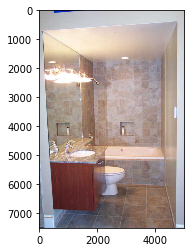

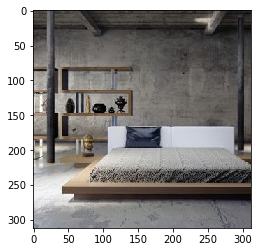

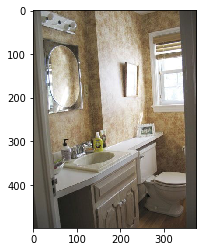

In [10]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [11]:
from scipy.misc import imresize
#from skimage.transform import rescale, resize, downscale_local_mean
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(2281, 224, 224, 3)
<class 'numpy.ndarray'>
(320, 224, 224, 3)


In [12]:
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(320, 224, 224, 3)


In [13]:
train_y = read_and_process_images(train_imgs)
train_y = np.array(train_y)
le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)
test_y = read_and_process_images(test_imgs)
test_y = np.array(test_y)
le = LabelEncoder()

test_y = le.fit_transform(test_y)

test_y=to_categorical(test_y)

test_y=np.array(test_y)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.2, random_state=42)
img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 2
batch_size = 64



In [10]:
del train_img
del train_y
del train_imgs 
del test_imgs
gc.collect()

4

In [ ]:
from tensorflow.keras import callbacks
nb_epoch = 50

model = vgg16_model(img_rows, img_cols, channel, num_classes)

model.summary()
# Start Fine-tuning

es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])




In [15]:
score = model.evaluate(test_img, test_y, verbose=0)
print(score)

[0.33075120896100996, 0.8875]


<Figure size 432x288 with 0 Axes>

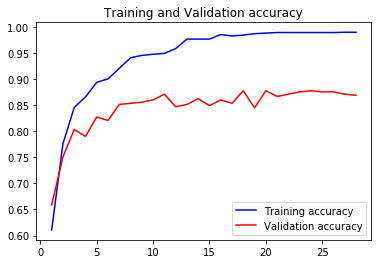

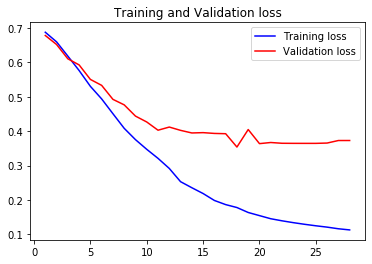

<Figure size 432x288 with 0 Axes>

In [28]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()





In [17]:
pred_y=model.predict(test_img)

print(test_img.shape)
print(pred_y.shape)

(320, 224, 224, 3)
(320, 2)


In [18]:
Y_pred =[]
for i in range(length_test):
    
    if pred_y[i][1] > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
    i +=1
    if i == length_test: 
        break

print(type(Y_pred))
Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(1)
    else:
        Y_test.append(0)
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)


<class 'list'>
(320,)
<class 'numpy.ndarray'>
[0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 0 0
 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1
 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1
 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0
 1 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0
 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1]
<class 'list'>
(320,)
<class 'numpy.ndarray'>
[0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0
 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1
 0 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 

0.8875

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[139,  16],
       [ 20, 145]])

Data Flow

In [15]:
from keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 32 
    
#Create train generator.
train_datagen = ImageDataGenerator(rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                  horizontal_flip=True,
                                   fill_mode='nearest')
        

train_generator = train_datagen.flow(X_train, Y_train, shuffle=True,
                                     batch_size=BATCH_SIZE, seed=1)

#val_datagen = ImageDataGenerator(rescale = 1./255)
#val_generator = val_datagen.flow(X_valid, Y_valid,  
                                  # batch_size=BATCH_SIZE, seed=1) 

In [18]:
from tensorflow.keras import callbacks
#nb_epoch = 50
img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 2
batch_size = 32


model = vgg16_model(img_rows, img_cols, channel, num_classes)

model.summary()
# Start Fine-tuning

#es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
#history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])

batch_size = BATCH_SIZE
train_steps_per_epoch = X_train.shape[0] // batch_size
val_steps_per_epoch = X_valid.shape[0] // batch_size

es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=(X_valid, Y_valid),
                              validation_steps=val_steps_per_epoch,
                              epochs=10, verbose=1,callbacks=[es_callback])
#history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))

# Make predictions
predictions_valid = model.predict(X_valid, batch_size=128, verbose=1)

# Cross-entropy loss score
score = log_loss(Y_valid, predictions_valid)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [19]:



score = model.evaluate(test_img,test_y)
print(score)
pred_y=model.predict(test_img)
Y_pred =[]
for i in range(length_test):
    
    if pred_y[i][1] > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
    i +=1
    if i == length_test: 
        break

print(type(Y_pred))
Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(1)
    else:
        Y_test.append(0)
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)



320/320 [==============================] - 1s 4ms/step
[0.44044382870197296, 0.86875]
<class 'list'>
(320,)
<class 'numpy.ndarray'>
[1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1
 1 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0
 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1
 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1
 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0]
<class 'list'>
(320,)
<class 'numpy.ndarray'>
[1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1
 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1
 1 1 0 1 1 1 0 1 0 0 0

0.86875

# Data 2

In [5]:
train_dir = '/media/D2/lilian/google_all/trainpreview'
train_imgs = ['/media/D2/lilian/google_all/trainpreview/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = '/media/D2/lilian/google_all/testall'
test_imgs = ['/media/D2/lilian/google_all/testall/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)


In [6]:
#from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)

<class 'numpy.ndarray'>
(9121, 224, 224, 3)


In [7]:
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(320, 224, 224, 3)


In [8]:
train_y = read_and_process_images(train_imgs)
train_y = np.array(train_y)
le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)
test_y = read_and_process_images(test_imgs)
test_y = np.array(test_y)
le = LabelEncoder()

test_y = le.fit_transform(test_y)

test_y=to_categorical(test_y)

test_y=np.array(test_y)



In [9]:
del train_imgs
del test_imgs
gc.collect()

4

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.2, random_state=42)
img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 2
batch_size = 32


In [17]:
from tensorflow.keras import callbacks

nb_epoch = 30
model = vgg16_model(img_rows, img_cols, channel, num_classes)
model.summary()
# Start Fine-tuning
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])
#history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid))
# Make predictions
predictions_valid = model.predict(X_valid, batch_size=64, verbose=1)
# Cross-entropy loss score
score = log_loss(Y_valid, predictions_valid)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [18]:
score = model.evaluate(test_img, test_y, verbose=0)
print(score)

[0.5258297756314277, 0.859375]


<Figure size 432x288 with 0 Axes>

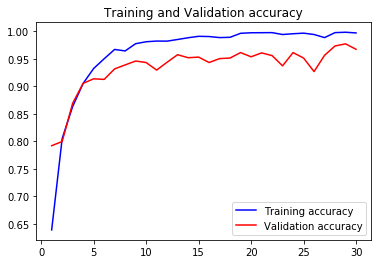

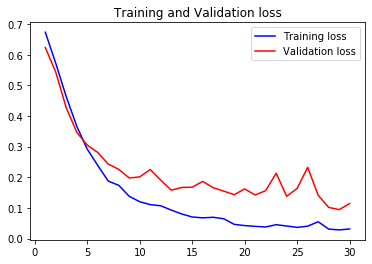

<Figure size 432x288 with 0 Axes>

In [19]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()




(320, 224, 224, 3)
(320, 2)


In [21]:
pred_y=model.predict(test_img)

print(test_img.shape)
print(pred_y.shape)

Y_pred =[]
for i in range(length_test):
    
    if pred_y[i][1] > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
    i +=1
    if i == length_test: 
        break

print(type(Y_pred))
Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(1)
    else:
        Y_test.append(0)
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)



(320, 224, 224, 3)
(320, 2)
<class 'list'>
(320,)
<class 'numpy.ndarray'>
[1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1
 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1
 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1
 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1
 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0
 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0]
<class 'list'>
(320,)
<class 'numpy.ndarray'>
[1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1
 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 1 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1
 0 0 

0.859375

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[  0, 155],
       [  0, 165]])

# Data 3

In [13]:
train_dir = 'trainpreview1'
train_imgs = ['trainpreview1/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'testall'
test_imgs = ['testall/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test = len(test_imgs)

In [14]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)

test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(18206, 224, 224, 3)
<class 'numpy.ndarray'>
(320, 224, 224, 3)


In [15]:
train_y = read_and_process_images(train_imgs)
train_y = np.array(train_y)
le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)
test_y = read_and_process_images(test_imgs)
test_y = np.array(test_y)
le = LabelEncoder()

test_y = le.fit_transform(test_y)

test_y=to_categorical(test_y)

test_y=np.array(test_y)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.2, random_state=42)
img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 2
batch_size = 32


In [17]:
del train_imgs
del train_img
del test_imgs
del train_y

In [18]:
gc.collect()

31

In [19]:
from tensorflow.keras import callbacks

nb_epoch = 20

model = vgg16_model(img_rows, img_cols, channel, num_classes)

model.summary()
# Start Fine-tuning
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, Y_train,batch_size=batch_size,epochs=nb_epoch,shuffle=True,verbose=1,validation_data=(X_valid, Y_valid),callbacks=[es_callback])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

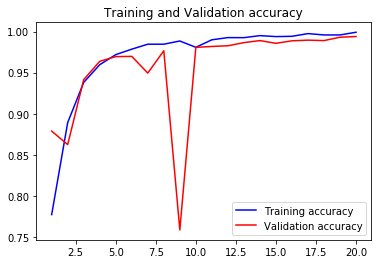

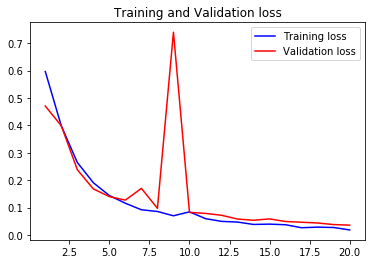

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [8]:
train_y = read_and_process_images(train_imgs)
train_y = np.array(train_y)
le = LabelEncoder()

train_y = le.fit_transform(train_y)

train_y=to_categorical(train_y)

train_y=np.array(train_y)
test_y = read_and_process_images(test_imgs)
test_y = np.array(test_y)
le = LabelEncoder()

test_y = le.fit_transform(test_y)

test_y=to_categorical(test_y)

test_y=np.array(test_y)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_img,train_y,test_size=0.05, random_state=42)
img_rows, img_cols = 224, 224 # Resolution of inputs
channel = 3
num_classes = 2
batch_size = 32

In [10]:
del train_imgs
del train_img
del test_imgs
del train_y
gc.collect()

4

In [20]:
score = model.evaluate(test_img, test_y, verbose=0)
print(score)

[0.36368607431650163, 0.890625]


In [21]:
pred_y=model.predict(test_img)
print(test_y.shape)
print(pred_y.shape)


Y_pred =[]
for i in range(length_test):
    
    if pred_y[i][1] > 0.5:
        Y_pred.append(1)
    else:
        Y_pred.append(0)
    i +=1
    if i == length_test: 
        break

print(type(Y_pred))
Y_pred = np.array(Y_pred)
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][1] > 0.5:
        Y_test.append(1)
    else:
        Y_test.append(0)
    i +=1
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

(320, 2)
(320, 2)
<class 'list'>
(320,)
<class 'numpy.ndarray'>
[0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 1 0 1 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0
 1 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1
 0 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0
 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0]
<class 'list'>
(320,)
<class 'numpy.ndarray'>
[0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1
 0 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 1 0
 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1
 0 0 0 0 0 0 0 

array([[135,  20],
       [ 15, 150]])